In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


/home/aaron/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [113]:
train_data = pd.read_csv('train_data.csv',index_col = 0)
test_kaggle = pd.read_csv('test_kaggle.csv',index_col=0)

In [114]:
train_data.columns

Index(['person', 'label', 'periodo', 'ad campaign hit_mean',
       'brand listing_mean', 'checkout_mean', 'conversion_mean',
       'generic listing_mean', 'lead_mean', 'search engine hit_mean',
       'searched products_mean', 'staticpage_mean', 'viewed product_mean',
       'visited site_mean', 'Bom', 'Bom - Sem Touch ID', 'Excelente',
       'Muito Bom', 'Novo', 'visitas_dom', 'visitas_lun', 'visitas_mar',
       'visitas_mier', 'visitas_jue', 'visitas_vier', 'visitas_sab',
       'conversiones_mean', 'vio_mas_de_5_veces', 'vio_color_mas_vendido'],
      dtype='object')

In [115]:
features = ['periodo', 'ad campaign hit_mean',
       'brand listing_mean', 'checkout_mean', 'conversion_mean',
       'generic listing_mean', 'lead_mean', 'search engine hit_mean',
       'searched products_mean', 'staticpage_mean', 'viewed product_mean',
       'visited site_mean', 'Bom', 'Bom - Sem Touch ID', 'Excelente',
       'Muito Bom', 'Novo', 'visitas_dom', 'visitas_lun', 'visitas_mar',
       'visitas_mier', 'visitas_jue', 'visitas_vier', 'visitas_sab',
       'conversiones_mean','vio_mas_de_5_veces','vio_color_mas_vendido']

In [116]:
X = train_data[features]
Y = train_data['label']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [119]:
dmatrix = xgb.DMatrix(data=train_data[features],label=train_data['label'],feature_names=features)

In [120]:
xgbRegressor = xgb.XGBRegressor(objective='binary:logistic',colsample_bytree=0.4,
                 gamma=0,
                 max_delta_step=0,
                 learning_rate=0.01,
                 max_depth=6,
                 min_child_weight=1.0,
                 n_estimators=100,           
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.75,
                 seed=42)


In [121]:
params = {'objective':'binary:logistic','colsample_bytree': 0.5, 'learning_rate': 1.0,
                'max_depth' : 10, 'n_estimators' : 20,'seed':123}

xgb.cv(dtrain=dmatrix,params=params)

[21:18:14] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=10
[21:18:14] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 296 extra nodes, 0 pruned nodes, max_depth=10
[21:18:14] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=10
[21:18:14] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 0 pruned nodes, max_depth=10
[21:18:14] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 0 pruned nodes, max_depth=10
[21:18:14] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 266 extra nodes, 0 pruned nodes, max_depth=10
[21:18:14] /opt/conda/conda-

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.047111,0.001515,0.055764,0.000587
1,0.043443,0.001218,0.054137,0.001099
2,0.037718,0.001918,0.053280,0.002312
3,0.032438,0.001323,0.049433,0.001975
4,0.025841,0.001431,0.044375,0.001332
5,0.020457,0.001193,0.041476,0.002041
6,0.017617,0.000522,0.038399,0.001593
7,0.015620,0.001346,0.035884,0.002584
8,0.013164,0.001433,0.033399,0.002703
9,0.011360,0.001839,0.031654,0.002761


In [122]:
xgbRegressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=1.0, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.75)

In [123]:
xgbRegressor.score(X_test,Y_test)

-0.35117000218054883

In [124]:
xg_reg = xgb.train(params=params, dtrain=dmatrix, num_boost_round=10)

[21:18:21] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 296 extra nodes, 0 pruned nodes, max_depth=10
[21:18:21] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=10
[21:18:21] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=10
[21:18:21] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=10
[21:18:21] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 506 extra nodes, 0 pruned nodes, max_depth=10
[21:18:22] /opt/conda/conda-bld/xgboost_1541449690605/work/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 576 extra nodes, 0 pruned nodes, max_depth=10
[21:18:22] /opt/conda/conda-

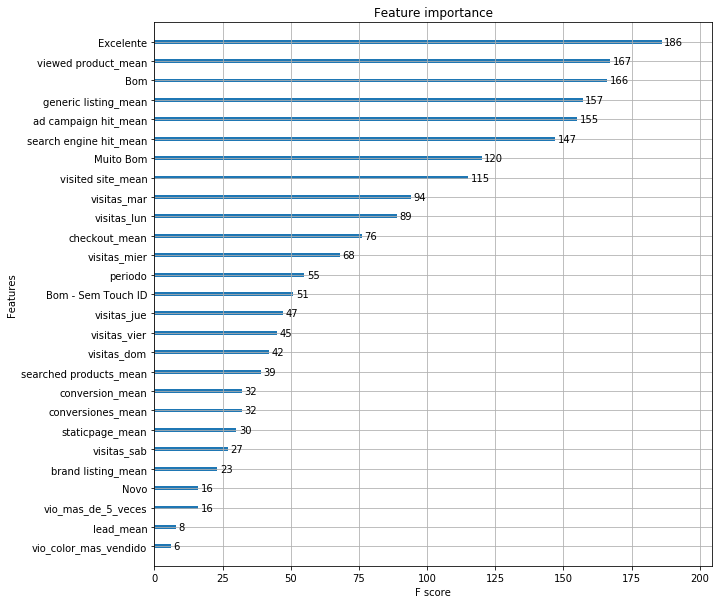

In [125]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Test Kaggle

In [126]:
test_kaggle['prediction'] = xgbRegressor.predict(test_kaggle[features])

In [127]:
submit_kaggle = pd.DataFrame({'person':test_kaggle['person'],'label':test_kaggle['prediction']})

In [128]:
submit_kaggle['label'] = submit_kaggle['label'].transform(lambda x: 0.0 if x < 0.0 else x)

In [129]:
submit_kaggle.reset_index(inplace = True)
submit_kaggle.drop(columns='index',inplace=True)
submit_kaggle.set_index(keys='person',inplace=True)

In [130]:
submit_kaggle.to_csv('submit_kaggle.csv')